Summary
Columns :
Train Column :
Deleted Column : Gender
Model Testted :
Model Applied :

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [3]:
#Input Data
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )

In [4]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [5]:
#check out missing value
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [6]:
#there are 5 numerical columns from the data
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [7]:
#check out number of missing value
train_missval_col = (insurance_data.isnull().sum())
train_missval_col

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [8]:
#checkout distribution of data in the column which has missing value
insurance_data.Gender.value_counts()

M    7137
F    6762
Name: Gender, dtype: int64

In [11]:
#list all the object columns
index_object = insurance_data.select_dtypes(include='object').columns
print(index_object)

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Gender'],
      dtype='object')


In [9]:
#list all the numerical columns
n_column = insurance_data.columns
n_column

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age', 'Claim'],
      dtype='object')

In [12]:
#list all distribution of each columns
def columns_distinct(df, index_object):
  for col in index_object:
    a = df[col][df[col]=='unknown'].count()
    print(col, df[col].nunique())
    print('{:s} : {:.0%}'.format(col, a/45211))
    print(df[col].value_counts())
    
    print(" ")

columns_distinct(insurance_data, index_object)

Agency 16
Agency : 0%
EPX    26712
CWT     6572
C2B     6280
JZI     4851
SSI      807
JWT      580
RAB      577
LWC      532
TST      389
KML      293
ART      248
CCR      155
TTW       72
CBH       70
CSR       66
ADM       56
Name: Agency, dtype: int64
 
Agency Type 2
Agency Type : 0%
Travel Agency    34917
Airlines         13343
Name: Agency Type, dtype: int64
 
Distribution Channel 2
Distribution Channel : 0%
Online     47434
Offline      826
Name: Distribution Channel, dtype: int64
 
Product Name 26
Product Name : 0%
Cancellation Plan                       14202
2 way Comprehensive Plan                10000
Rental Vehicle Excess Insurance          6572
Basic Plan                               4209
Bronze Plan                              3057
1 way Comprehensive Plan                 2510
Value Plan                               2082
Silver Plan                              1705
Annual Silver Plan                       1088
Ticket Protector                          807
Travel Cru

In [13]:
#notice that there is a similar value, which can be categorized as one in the product name: Travel Cruise Protect Family with Travel Cruise Protect
insurance_data.loc[insurance_data['Product Name'] == 'Travel Cruise Protect Family', 'Product Name'] = 'Travel Cruise Protect'

In [14]:
#check correlation between gender and other factor
#first filter gender
filter_gender = insurance_data.drop(columns = 'Gender', axis = 1)
filter_gender.shape

(48260, 10)

In [15]:
filter_gender.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,23,0


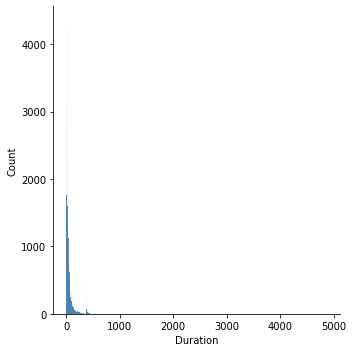

In [18]:
sns.displot(insurance_data['Duration'])

# Correlation of categorical variables

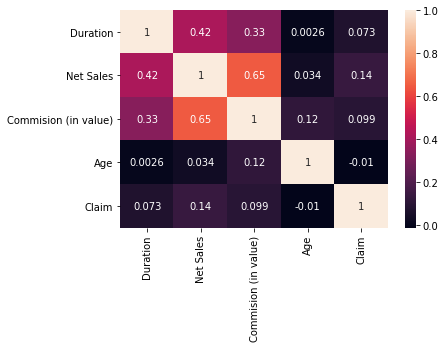

In [19]:
import seaborn as sns

data_corr_matrix = filter_gender.corr()
sns.heatmap(data=data_corr_matrix, annot=True)

In [20]:
#sort variables which have high correlation with target variable (Claim)
data_corr_matrix['Claim'].sort_values(ascending=False)

Claim                   1.000000
Net Sales               0.137079
Commision (in value)    0.098935
Duration                0.073068
Age                    -0.010401
Name: Claim, dtype: float64

In [21]:
#del insurance_data['Gender'] since it has majority of missing value
train_data = insurance_data[['Agency Type', 'Age', 'Product Name',
       'Net Sales','Commision (in value)', 'Claim', 'Distribution Channel', 'Agency', 'Duration']]

In [22]:
#label encoding for Product Name since it has >25 unique value, and will be easily calculated using label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#train_data['Agency'] = le.fit_transform(train_data['Agency'])
#train_data['Agency Type'] = le.fit_transform(train_data['Agency Type'])
#train_data['Distribution Channel'] = le.fit_transform(train_data['Distribution Channel'])
train_data['Product Name'] = le.fit_transform(train_data['Product Name'])
#train_data['Destination'] = le.fit_transform(train_data['Destination'])
train_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Agency Type,Age,Product Name,Net Sales,Commision (in value),Claim,Distribution Channel,Agency,Duration
0,Travel Agency,29,16,19.8,11.88,0,Online,CWT,61
1,Travel Agency,36,10,63.0,0.00,0,Online,EPX,93
2,Travel Agency,25,1,22.0,0.00,0,Online,EPX,22
3,Airlines,24,17,54.5,13.63,0,Online,C2B,14
4,Travel Agency,23,10,10.0,0.00,0,Online,EPX,90


In [24]:
#from scipy.stats import chisquare

#data_corr_cat=train_data.apply(lambda x : pd.factorize(x)[0])+1

#pd.DataFrame([chisquare(train_data[x].values,f_exp=train_data.values.T,axis=1)[0] for x in train_data])

In [25]:
#plot pearson correlation for train data
corr_pearson = train_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

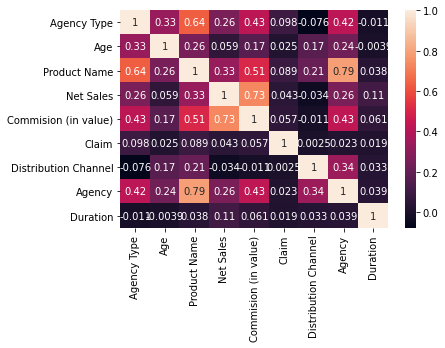

In [26]:
import seaborn as sns
sns.heatmap(data=corr_pearson, annot=True)

In [ ]:
'''bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
group_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-120']
age_categories = pd.cut(train['age'], bins, labels=group_names)
train['age_categories'] = pd.cut(train['age'], bins, labels=group_names)
age_categories
pd.value_counts(train['age_categories'])'''

In [ ]:
plt.hist(insurance_data['Age'], bins = 10)

In [27]:
#from analysis above, we can say that no correlation related to gender.
#therefore, we delete it
del insurance_data['Gender']

In [28]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,23,0


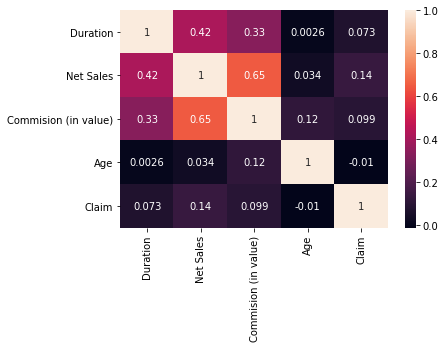

In [29]:
import seaborn as sns

data_corr_matrix = insurance_data.corr()
sns.heatmap(data=data_corr_matrix, annot=True)

# Initialize model

In [30]:
#two variables: 
data_final = insurance_data.filter(['Agency','Duration','Net Sales','Commision (in value)', 'Claim', 'Agency Type', 'Distribution Channel','Age', 'Product Name'], axis=1)

In [31]:
#one_hot_encoding for categorical variables
ohe_final = pd.get_dummies(data_final, columns = ['Agency','Agency Type', 'Distribution Channel', 'Product Name'])

In [32]:
ohe_final.columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Claim', 'Age',
       'Agency_ADM', 'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR',
       'Agency_CSR', 'Agency_CWT', 'Agency_EPX', 'Agency_JWT', 'Agency_JZI',
       'Agency_KML', 'Agency_LWC', 'Agency_RAB', 'Agency_SSI', 'Agency_TST',
       'Agency_TTW', 'Agency Type_Airlines', 'Agency Type_Travel Agency',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect',
       'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan',
       'Product Name_Annual Travel Protect Gold',
       'Product Name_Annual Travel Protect Platinum',
       'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Child Comprehensive Plan',
       'Product Name_Comprehensive Plan', 'Product Name

In [33]:
ohe_final.shape

(48260, 50)

In [34]:
X = ohe_final.drop('Claim', axis = 1)
y = ohe_final.Claim

In [35]:
#apply train test split with stratify since it has class imbalance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [36]:
#perform xgboost classifier
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [37]:
#check accuracy of the xgboost classifier report
#notice f1 score is low, which is reasonable since it has class imbalance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9510
           1       0.00      0.00      0.00       142

    accuracy                           0.99      9652
   macro avg       0.49      0.50      0.50      9652
weighted avg       0.97      0.99      0.98      9652



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#check accuracy for the test data
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9652
           1       0.00      0.00      0.00         0

    accuracy                           0.99      9652
   macro avg       0.50      0.49      0.50      9652
weighted avg       1.00      0.99      0.99      9652



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

In [39]:
#perform random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9510
           1       0.14      0.04      0.06       142

    accuracy                           0.98      9652
   macro avg       0.56      0.52      0.52      9652
weighted avg       0.97      0.98      0.98      9652



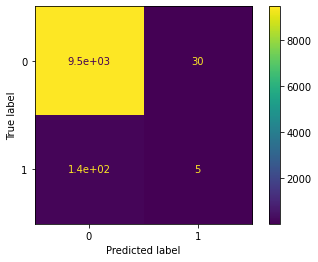

In [40]:
#plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_test,y_test)

In [41]:
#perform several other models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [42]:
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size= 0.3,
random_state= SEED)
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [43]:
from sklearn.metrics import accuracy_score
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set

  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
  print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression : 0.985
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14262
           1       0.00      0.00      0.00       216

    accuracy                           0.99     14478
   macro avg       0.49      0.50      0.50     14478
weighted avg       0.97      0.99      0.98     14478

K Nearest Neighbours : 0.985
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14262
           1       0.18      0.01      0.02       216

    accuracy                           0.98     14478
   macro avg       0.58      0.50      0.50     14478
weighted avg       0.97      0.98      0.98     14478

Classification Tree : 0.969
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14262
           1       0.05      0.06      0.06       216

    accuracy                           0.97     14478
   macro avg       0.52      0.52      0.52

In [ ]:
#check out X columns
X.columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Agency Type_Airlines', 'Agency Type_Travel Agency',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect',
       'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan',
       'Product Name_Annual Travel Protect Gold',
       'Product Name_Annual Travel Protect Platinum',
       'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Child Comprehensive Plan',
       'Product Name_Comprehensive Plan', 'Product Name_Gold Plan',
       'Product Name_Individual Comprehensive Plan',
       'Product Name_Premier Plan',
       'Product Name_Rental Vehicle Excess Insurance',
       'Product Name_Silver Plan',
       'Product Name_Single Trip Travel Protect Gold',
       

# Imbalance Class (not performed)

In [ ]:
'''from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros)) 

Original dataset shape Counter({0: 47552, 1: 708})
Resample dataset shape Counter({0: 47552, 1: 47552})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#x_ros.shape

(95104, 49)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42, stratify=y_ros)

In [ ]:
#X_train.shape

(76083, 50)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_test = xgb.predict(X_test)
#print('{:s} : {:.3f}'.format('Random Forest', accuracy_score(y_test, y_pred)))    
print(classification_report(y_test,xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9746
           1       1.00      1.00      1.00      9275

    accuracy                           1.00     19021
   macro avg       1.00      1.00      1.00     19021
weighted avg       1.00      1.00      1.00     19021



# SMOTE Imbalance Class

In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:
X_sm, y_sm = sm.fit_sample(X, y)
print(X_sm.shape)
print(y_sm.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(95104, 49)
(95104,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 42)

In [48]:
#perform xgboost classifier on smote transformation
from xgboost import XGBClassifier
xgb_smote = XGBClassifier()
xgb_smote.fit(X_train, y_train)

y_pred = xgb_smote.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      9504
           1       0.87      0.86      0.86      9517

    accuracy                           0.86     19021
   macro avg       0.86      0.86      0.86     19021
weighted avg       0.86      0.86      0.86     19021



# Hyperparameter

In [50]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [52]:
#create function for hyperparameter summary
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [62]:
#perform xgb classifier
xgb_1 = XGBClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 150, 200]
    ,'max_depth': [2, 3, 4, 8, 16, 32, None]
    ,'learning_rate': [0.03, 0.1, 0.3, 1]
}
rs = RandomizedSearchCV(xgb_1, parameters, cv=5,n_iter=5)
rs.fit(X_train, y_train)

print_results(rs)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: Invalid Parameter format for max_depth expect int but value='None'

  FitFailedWarning)


BEST PARAMS: {'n_estimators': 200, 'max_depth': 16, 'learning_rate': 0.03}

0.974 (+/-0.003) for {'n_estimators': 200, 'max_depth': 16, 'learning_rate': 0.03}
0.844 (+/-0.009) for {'n_estimators': 5, 'max_depth': 4, 'learning_rate': 1}
0.968 (+/-0.002) for {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 1}
0.82 (+/-0.005) for {'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.03}
nan (+/-nan) for {'n_estimators': 150, 'max_depth': None, 'learning_rate': 0.3}


In [63]:
xgb_2 = XGBClassifier()
parameters = {
    'n_estimators': [200],
    'max_depth': [16],
    'learning_rate': [0.03]
}
rs_best = RandomizedSearchCV(xgb_2, parameters, cv=5,n_iter=10)
rs_best.fit(X_train, y_train)
print(classification_report(y_test,rs_best.predict(X_test)))
print_results(rs_best)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9504
           1       0.98      0.97      0.98      9517

    accuracy                           0.98     19021
   macro avg       0.98      0.98      0.98     19021
weighted avg       0.98      0.98      0.98     19021

BEST PARAMS: {'n_estimators': 200, 'max_depth': 16, 'learning_rate': 0.03}

0.974 (+/-0.003) for {'n_estimators': 200, 'max_depth': 16, 'learning_rate': 0.03}


In [82]:
#perform xgb classifier
rfc_1 = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100]
    ,'max_depth': [2, 3, 4, 8, 16, None]
}
rs_rfc = RandomizedSearchCV(rfc_1, parameters, cv=5,n_iter=5)
rs_rfc.fit(X_train, y_train)

print_results(rs_rfc)

BEST PARAMS: {'n_estimators': 100, 'max_depth': None}

0.78 (+/-0.013) for {'n_estimators': 50, 'max_depth': 2}
0.799 (+/-0.022) for {'n_estimators': 5, 'max_depth': 4}
0.792 (+/-0.008) for {'n_estimators': 50, 'max_depth': 3}
0.977 (+/-0.002) for {'n_estimators': 100, 'max_depth': None}
0.976 (+/-0.004) for {'n_estimators': 50, 'max_depth': None}


In [84]:
rfc_2 = RandomForestClassifier()
parameters = {
    'n_estimators': [100]
}
rs_rfc_best = RandomizedSearchCV(xgb_2, parameters, cv=5,n_iter=10)
rs_rfc_best.fit(X_train, y_train)
print(classification_report(y_test,rs_rfc_best.predict(X_test)))
print_results(rs_rfc_best)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


              precision    recall  f1-score   support

           0       0.86      0.87      0.87      9504
           1       0.87      0.86      0.86      9517

    accuracy                           0.86     19021
   macro avg       0.86      0.86      0.86     19021
weighted avg       0.86      0.86      0.86     19021

BEST PARAMS: {'n_estimators': 100}

0.863 (+/-0.004) for {'n_estimators': 100}


# Test Data

In [64]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [65]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [66]:
test_final = test_data.filter(['Agency','Duration','Net Sales','Commision (in value)', 'Agency Type', 'Distribution Channel','Age', 'Product Name'], axis=1)

In [67]:
ohe_test = pd.get_dummies(test_final, columns = ['Agency','Agency Type', 'Distribution Channel', 'Product Name'])

In [68]:
ohe_test.columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_ADM',
       'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR',
       'Agency_CWT', 'Agency_EPX', 'Agency_JWT', 'Agency_JZI', 'Agency_KML',
       'Agency_LWC', 'Agency_RAB', 'Agency_SSI', 'Agency_TST', 'Agency_TTW',
       'Agency Type_Airlines', 'Agency Type_Travel Agency',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect',
       'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan',
       'Product Name_Annual Travel Protect Gold',
       'Product Name_Annual Travel Protect Platinum',
       'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Child Comprehensive Plan',
       'Product Name_Comprehensive Plan', 'Product Name_Gold Pla

In [69]:
ohe_test.shape

(15832, 49)

In [70]:
X_test_data = ohe_test

In [71]:
print(X_test_data.shape)
print(X.shape)

(15832, 49)
(48260, 49)


In [72]:
X.columns = X_test_data.columns

# Basic Prediction

In [73]:
y_basic_xgb = rs_best.predict(X_test_data.values)

In [74]:
res_basic = pd.DataFrame(y_basic_xgb) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res_basic.index = X_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res_basic.columns = ["prediction"]
res_basic.to_csv("prediction_xgb.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [75]:
from google.colab import files
res_basic.to_csv('prediction_xgb.csv')         
files.download('prediction_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
y_basic_rfc = rs_rfc_best.predict(X_test_data.values)

In [86]:
res_basic = pd.DataFrame(y_basic_rfc) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res_basic.index = X_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res_basic.columns = ["prediction"]
res_basic.to_csv("prediction_rfc.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [87]:
from google.colab import files
res_basic.to_csv('prediction_rfc.csv')         
files.download('prediction_rfc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Feature Selection RFE

In [ ]:
#perform RFE using xgb from hyperparameter tuning
#hyperparameter tuned can't be applied to feature selection

In [94]:
xgb_3 = XGBClassifier()
from sklearn.feature_selection import RFE
selector = RFE(xgb_3, step=1)
selector = selector.fit(X_train, y_train)

In [95]:
selector.support_


array([ True,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False, False, False, False])

In [96]:

selected_rf_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,Duration,1
44,Product Name_Single Trip Travel Protect Silver,1
42,Product Name_Single Trip Travel Protect Gold,1
41,Product Name_Silver Plan,1
37,Product Name_Gold Plan,1
36,Product Name_Comprehensive Plan,1
34,Product Name_Cancellation Plan,1
33,Product Name_Bronze Plan,1
29,Product Name_Annual Travel Protect Gold,1
25,Product Name_2 way Comprehensive Plan,1


In [97]:
X_important_train = selector.transform(np.array(X_train))
X_important_test = selector.transform(np.array(X_test))

In [98]:
xgb_important = XGBClassifier()
# Train the new classifier on the new dataset containing the most important features
xgb_important.fit(X_important_train, y_train)
print(classification_report(y_test,xgb_important.predict(X_important_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      9504
           1       0.87      0.86      0.86      9517

    accuracy                           0.87     19021
   macro avg       0.87      0.87      0.87     19021
weighted avg       0.87      0.87      0.87     19021



In [99]:
X_final_test = selector.transform(np.array(X_test_data))

In [100]:
y_test_rfe = xgb_important.predict(X_final_test)

In [101]:
res_basic = pd.DataFrame(y_test_rfe) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res_basic.index = X_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res_basic.columns = ["prediction"]
res_basic.to_csv("prediction_xgb_rfe.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [102]:
from google.colab import files
res_basic.to_csv('prediction_xgb_rfe.csv')         
files.download('prediction_xgb_rfe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Boruta

In [78]:
!pip install Boruta

     |████████████████████████████████| 61kB 3.2MB/s 


In [79]:
from boruta import BorutaPy

In [103]:
rfc_b = RandomForestClassifier()
boruta_selector = BorutaPy(rfc_b)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train)) 

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=1000, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FEAC08D7678,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimator

In [104]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [105]:
rfb_important = RandomForestClassifier(random_state=1)

# Train the new classifier on the new dataset containing the most important features
rfb_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [106]:
print(classification_report(y_test,rfb_important.predict(X_important_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9504
           1       0.98      0.98      0.98      9517

    accuracy                           0.98     19021
   macro avg       0.98      0.98      0.98     19021
weighted avg       0.98      0.98      0.98     19021



In [107]:
Xb_final_test = boruta_selector.transform(np.array(X_test_data))

In [108]:
y_test_rfb = rfb_important.predict(Xb_final_test)

In [109]:
res_basic = pd.DataFrame(y_test_rfb) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res_basic.index = X_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res_basic.columns = ["prediction"]
res_basic.to_csv("prediction_selection_boruta.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [110]:
from google.colab import files
res_basic.to_csv('prediction_selection_boruta.csv')         
files.download('prediction_selection_boruta.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>